In [1]:
import geopandas as gpd
import numpy as np
import rasterio
from rasterio.features import rasterize
from shapely.geometry import LineString
from scipy.ndimage import distance_transform_edt
from rasterio.transform import from_bounds
import os
from shapely.geometry import mapping

# River depth map

In [11]:
river_shapefile = "../00_Data/old_national/annotations/hydrology/_old/LKg_1185/LKg_1185_1975/river.shp"
input_crs='EPSG:21781'
resolution = 0.5
max_depth = 2

# Load river shapefile as a GeoDataFrame
gdf = gpd.read_file(river_shapefile)

In [7]:
river_shapefile = "../00_Data/old_national/annotations/hydrology/_old/LKg_1185/LKg_1185_1975/river.shp"
input_crs='EPSG:21781'
resolution = 0.5
max_depth = 2

# Load river shapefile as a GeoDataFrame
gdf = gpd.read_file(river_shapefile)

if gdf.crs is None:
    gdf.set_crs(input_crs, inplace=True)
    print(f"CRS was missing. Set to {input_crs}")
    
# Set up the bounds of the raster (based on the geometry bounds)
minx, miny, maxx, maxy = gdf.total_bounds

# Define the output raster dimensions (based on the finer resolution)
width = int((maxx - minx) / resolution)
height = int((maxy - miny) / resolution)


# Create an affine transform for the raster
transform = rasterio.transform.from_bounds(minx, miny, maxx, maxy, width, height)

# Create an empty array to store the raster data
raster = np.zeros((height, width), dtype=rasterio.float32)

# Prepare geometries and corresponding 'hoehe' values for rasterization
shapes = ((mapping(geom), 1) for geom in gdf.geometry)

# Rasterize the MultiLineString geometries using the 'hoehe' values
raster = rasterize(
    shapes=shapes,
    out_shape=raster.shape,
    transform=transform,
    fill=0,  # Background value
    dtype=rasterio.float32
    )

import matplotlib.pyplot as plt

plt.imshow(raster, cmap='Blues', extent=(minx, maxx, miny, maxy))
plt.colorbar(label='Raster Value')
plt.title('Rasterized River Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

DriverError: Failed to open dataset (flags=68): /gmp2/00_Data/old_national/annotations/hydrology/_old/LKg_1185/LKg_1185_1975/river.shp

In [11]:
# Calculate Euclidean distance to the nearest edge of the river polygons
distance_to_edge = distance_transform_edt(raster == 0)

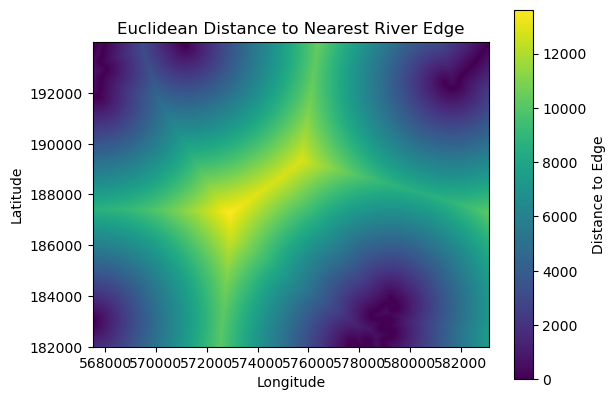

In [13]:
plt.imshow(distance_to_edge, cmap='viridis', extent=(minx, maxx, miny, maxy))
plt.colorbar(label='Distance to Edge')
plt.title('Euclidean Distance to Nearest River Edge')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [14]:
# Calculate Euclidean distance to the nearest edge of the river polygons
distance_to_edge = distance_transform_edt(raster)

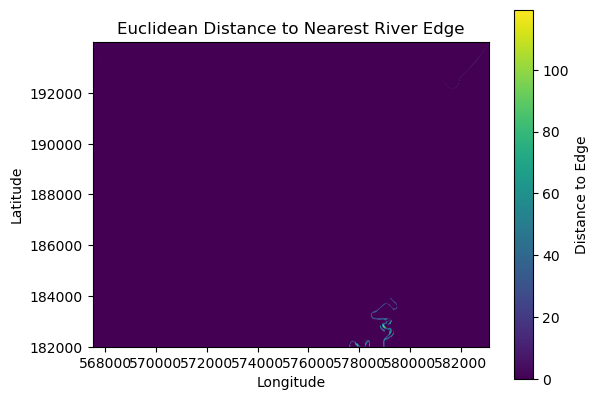

In [15]:
plt.imshow(distance_to_edge, cmap='viridis', extent=(minx, maxx, miny, maxy))
plt.colorbar(label='Distance to Edge')
plt.title('Euclidean Distance to Nearest River Edge')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [19]:
# Normalize the distance to create a gradient from the river edge (0 depth) to the center (max depth)
max_distance = distance_to_edge.max()
depth_gradient = max_depth * (distance_to_edge / max_distance)

# Apply the river mask (depth only inside river polygons)
river_depth_raster = np.where(raster == 1, depth_gradient, 0)

In [20]:
# Write the depth raster to a GeoTIFF file
output_raster = "output/test.tif"
with rasterio.open(
    output_raster,
    'w',
    driver='GTiff',
    height=height,
    width=width,
    count=1,
    dtype=rasterio.float32,
    crs=gdf.crs,
    transform=transform
) as dst:
    dst.write(river_depth_raster, 1)

print(f"River depth raster saved to {output_raster}")

River depth raster saved to output/test.tif


In [3]:
a = "LKg_1165_1975"

a.split("_")[0]+"_"+a.split("_")[1]

'LKg_1165'

In [16]:
base_directory = "/Users/mischabauckhage/Documents/ETH/02_Master/3_Semester/GMP2/gmp2/00_Data/old_national/annotations/hydrology/_old/"
sub_directories = ["LKg_1166/","LKg_1185","LKg_1186"]
sub_sub_directories_1 = ["LKg_1166_1954/","LKg_1166_1975/","LKg_1166_1987/"]
sub_sub_directories_2 = ["LKg_1185_1956/","LKg_1185_1975/","LKg_1185_1987/"]
sub_sub_directories_3 = ["LKg_1186_1956_EN/","LKg_1186_1975/","LKg_1186_1987/"]
river_shapefiles_endings = ["_lake.shp","_river.shp"]
output_directory_raster = "processed_data/"

sub_sub_directories = [sub_sub_directories_1,sub_sub_directories_2,sub_sub_directories_3]

for num, dir in enumerate(sub_directories):
    for sub_dir in sub_sub_directories[num]:
        for files in river_shapefiles_endings:
            input = base_directory+dir+sub_dir+sub_dir[:-1].split('_EN')[0]+files
            output = base_directory+dir+sub_dir+files[1:-3]+sub_dir[:-1]+files[:-4]+".tif"
            
            print(input)
            
            

/Users/mischabauckhage/Documents/ETH/02_Master/3_Semester/GMP2/gmp2/00_Data/old_national/annotations/hydrology/_old/LKg_1166/LKg_1166_1954/LKg_1166_1954_lake.shp
/Users/mischabauckhage/Documents/ETH/02_Master/3_Semester/GMP2/gmp2/00_Data/old_national/annotations/hydrology/_old/LKg_1166/LKg_1166_1954/LKg_1166_1954_river.shp
/Users/mischabauckhage/Documents/ETH/02_Master/3_Semester/GMP2/gmp2/00_Data/old_national/annotations/hydrology/_old/LKg_1166/LKg_1166_1975/LKg_1166_1975_lake.shp
/Users/mischabauckhage/Documents/ETH/02_Master/3_Semester/GMP2/gmp2/00_Data/old_national/annotations/hydrology/_old/LKg_1166/LKg_1166_1975/LKg_1166_1975_river.shp
/Users/mischabauckhage/Documents/ETH/02_Master/3_Semester/GMP2/gmp2/00_Data/old_national/annotations/hydrology/_old/LKg_1166/LKg_1166_1987/LKg_1166_1987_lake.shp
/Users/mischabauckhage/Documents/ETH/02_Master/3_Semester/GMP2/gmp2/00_Data/old_national/annotations/hydrology/_old/LKg_1166/LKg_1166_1987/LKg_1166_1987_river.shp
/Users/mischabauckhage/Do

In [5]:
base_directory = "/Users/mischabauckhage/Documents/ETH/02_Master/3_Semester/GMP2/gmp2/00_Data/old_national/annotations/hydrology/_old/"

for root, dirs, files in os.walk(base_directory):
    for file in files:
        if file.endswith(".shp"):
            input = os.path.join(root, file)
            output = input.replace("old_national","processed_data").replace(".shp",".tif")

            output_directory = os.path.dirname(output)
            #ensure_directory_exists(output_directory)
            
            filename = os.path.basename(os.path.dirname(output)) + ".tif"
            print(output_directory+"/"+filename)
            

In [12]:
base_directory = "/Users/mischabauckhage/Documents/ETH/02_Master/3_Semester/GMP2/gmp2/00_Data/old_national/annotations/hydrology/"

for root, dirs, files in os.walk(base_directory):
    for file in files:
        if file.endswith(".shp"):
            input = os.path.join(root, file)
            output = input.replace("old_national","processed_data").replace(".shp",".tif")

            output_directory = os.path.dirname(output)
            #ensure_directory_exists(output_directory)
            
            filename = os.path.basename(os.path.dirname(output)) + "_"+file.split(".")[0]+".tif"
            print(output_directory+"/"+filename)
            

/Users/mischabauckhage/Documents/ETH/02_Master/3_Semester/GMP2/gmp2/00_Data/processed_data/annotations/hydrology/LKg_1186/LKg_1186_1956_EN/LKg_1186_1956_EN_stream.tif
/Users/mischabauckhage/Documents/ETH/02_Master/3_Semester/GMP2/gmp2/00_Data/processed_data/annotations/hydrology/LKg_1186/LKg_1186_1956_EN/LKg_1186_1956_EN_river.tif
/Users/mischabauckhage/Documents/ETH/02_Master/3_Semester/GMP2/gmp2/00_Data/processed_data/annotations/hydrology/LKg_1186/LKg_1186_1956_EN/LKg_1186_1956_EN_wetland.tif
/Users/mischabauckhage/Documents/ETH/02_Master/3_Semester/GMP2/gmp2/00_Data/processed_data/annotations/hydrology/LKg_1186/LKg_1186_1956_EN/LKg_1186_1956_EN_lake.tif
/Users/mischabauckhage/Documents/ETH/02_Master/3_Semester/GMP2/gmp2/00_Data/processed_data/annotations/hydrology/LKg_1186/LKg_1186_1987/LKg_1186_1987_stream.tif
/Users/mischabauckhage/Documents/ETH/02_Master/3_Semester/GMP2/gmp2/00_Data/processed_data/annotations/hydrology/LKg_1186/LKg_1186_1987/LKg_1186_1987_river.tif
/Users/mischa

### Raster to DepthMap

In [3]:
import geopandas as gpd
import numpy as np
import rasterio
from rasterio.features import rasterize
from shapely.geometry import LineString
from scipy.ndimage import distance_transform_edt
from rasterio.transform import from_bounds
from shapely.geometry import mapping
import os
import logging
from rasterio.windows import from_bounds
from rasterio.merge import merge



In [8]:
input_raster = "/Users/mischabauckhage/Documents/ETH/02_Master/3_Semester/GMP2/gmp2/00_Data/processed_data/annotations/hydrology/LKg_1165/LKg_1166_1975/LKg_1165_1975_river_binary.tif"
output_raster = "/Users/mischabauckhage/Documents/ETH/02_Master/3_Semester/GMP2/gmp2/00_Data/processed_data/annotations/hydrology/LKg_1165/LKg_1166_1975/LKg_1165_1975_river.tif"

max_depth = 3

In [10]:


# Read the raster from the GeoTIFF file
with rasterio.open(input_raster) as src:
    raster = src.read(1)

print("Calculate distance to edge")
# Calculate Euclidean distance to the nearest edge of the river polygons
distance_to_edge = distance_transform_edt(raster)
depth_gradient = distance_to_edge / 5

# Cap the depth gradient at max_depth
depth_gradient = np.clip(depth_gradient, 0, max_depth)


# Apply the river mask (depth only inside river polygons)
river_depth_raster = np.where(raster == 1, depth_gradient, 0)



Calculate distance to edge
Write raster to file


NameError: name 'gdf' is not defined

In [13]:
# Write the depth raster to a GeoTIFF file
with rasterio.open(
    output_raster,
    'w',
    driver='GTiff',
    height=raster.shape[0],
    width=raster.shape[1],
    count=1,
    dtype=rasterio.float32,
    crs=src.crs,
    transform=src.transform
) as dst:
    dst.write(river_depth_raster, 1)

print(f"River depth raster saved to {output_raster}")




River depth raster saved to /Users/mischabauckhage/Documents/ETH/02_Master/3_Semester/GMP2/gmp2/00_Data/processed_data/annotations/hydrology/LKg_1165/LKg_1166_1975/LKg_1165_1975_river.tif


# Stitching multiple TIFFs

In [6]:
import rasterio
from rasterio.merge import merge
import numpy as np

def stitch_geotiffs(tiff_files, output_path):
    """
    Stitches together multiple GeoTIFF files based on their coordinates.
    Fills non-overlapping areas with zeros.
    
    :param tiff_files: List of paths to input GeoTIFF files.
    :param output_path: Path to save the stitched output GeoTIFF file.
    """

    # List to store opened raster objects
    src_files_to_mosaic = []

    # Open each GeoTIFF file
    for tiff_file in tiff_files:
        src = rasterio.open(tiff_file)
        src_files_to_mosaic.append(src)
    
    # Use `merge` to stitch rasters together
    # fill_value=0 will fill the non-overlapping areas with zero
    mosaic, out_transform = merge(src_files_to_mosaic)

    # Update metadata for the output file
    out_meta = src_files_to_mosaic[0].meta.copy()
    out_meta.update({
        "driver": "GTiff",
        "height": mosaic.shape[1],
        "width": mosaic.shape[2],
        "transform": out_transform,
        "compress": "lzw"  # Optional: compression to save space
    })
    
    # Write the mosaic to the output file
    with rasterio.open(output_path, "w", **out_meta) as dest:
        dest.write(mosaic)
    
    # Close all open source files
    for src in src_files_to_mosaic:
        src.close()


In [7]:

# Example usage
tiff_files = ["/Volumes/Drobo/00 Studium/02_Master/3_Semester/GMP2/00_Data/processed_data/annotations/hydrology/LKg_1165/LKg_1165_1975/LKg_1165_1975_river.tif",
              "/Volumes/Drobo/00 Studium/02_Master/3_Semester/GMP2/00_Data/processed_data/annotations/hydrology/LKg_1166/LKg_1166_1975/LKg_1166_1975_LKg_1166_1975_river.tif", 
              "/Volumes/Drobo/00 Studium/02_Master/3_Semester/GMP2/00_Data/processed_data/annotations/hydrology/LKg_1185/LKg_1185_1975/LKg_1185_1975_river.tif", 
              "/Volumes/Drobo/00 Studium/02_Master/3_Semester/GMP2/00_Data/processed_data/annotations/hydrology/LKg_1186/LKg_1186_1975/LKg_1186_1975_river.tif"]  # Add your file paths here
output_path = "/Volumes/Drobo/00 Studium/02_Master/3_Semester/GMP2/00_Data/processed_data/annotations/hydrology/stitched_output_rivers.tif"
stitch_geotiffs(tiff_files, output_path)

# Clipping

In [24]:
import rasterio
from rasterio.windows import from_bounds

def clip_geotiff(input_tiff, output_tiff, clip_extent):
    """
    Reads a GeoTIFF and clips it to the specified extent.
    
    :param input_tiff: Path to the input GeoTIFF file.
    :param output_tiff: Path to save the clipped GeoTIFF file.
    :param clip_extent: Tuple of (min_x, min_y, max_x, max_y) representing the clipping bounds.
    """

    # Open the input GeoTIFF
    with rasterio.open(input_tiff) as src:
        # Get the bounding box (clip extent)
        min_x, min_y, max_x, max_y = clip_extent
        
        # Create a window based on the given bounds
        window = from_bounds(min_x, min_y, max_x, max_y, src.transform)
        
        # Convert the window to integer indices
        row_off = int(window.row_off)
        col_off = int(window.col_off)
        height = int(window.height)
        width = int(window.width)
        
        # Read the windowed data
        clipped_data = src.read(window=window)

        # Update the transform for the clipped window
        clipped_transform = src.window_transform(window)
        
        # Update metadata for the output file
        out_meta = src.meta.copy()
        out_meta.update({
            "driver": "GTiff",
            "height": height,
            "width": width,
            "transform": clipped_transform
        })
        
        # Write the clipped data to the output file
        with rasterio.open(output_tiff, "w", **out_meta) as dest:
            dest.write(clipped_data)




In [27]:
# Example usage
input_tif = "/Volumes/Drobo/00 Studium/02_Master/3_Semester/GMP2/00_Data/processed_data/annotations/hydrology/stitched_rivers_1975.tif"
output_path = "/Volumes/Drobo/00 Studium/02_Master/3_Semester/GMP2/00_Data/processed_data/annotations/hydrology/stitched_rivers_1975_clipped.tif"

# Define the clipping extent (min_x, min_y, max_x, max_y)
# Get the bounding box from the first TIFF file
with rasterio.open("/Volumes/Drobo/00 Studium/02_Master/3_Semester/GMP2/01_Segmentation/data/Siegfried.tif") as src:
    bounds = src.bounds
    xmin, ymin, xmax, ymax = bounds.left, bounds.bottom, bounds.right, bounds.top

print(f"Clipping extent: xmin={xmin}, ymin={ymin}, xmax={xmax}, ymax={ymax}")

clip_extent = (xmin, ymin, xmax, ymax)


Clipping extent: xmin=581549.0, ymin=192585.0, xmax=585423.0, ymax=195411.0


In [28]:
clip_geotiff(input_tif, output_path, clip_extent)

# Downsampling

In [4]:
import cv2

def downsample_image(input_path, output_path, scale_percent=50):
    """
    Downsamples an image by a given scale percentage.

    Parameters:
        input_path (str): Path to the input image.
        output_path (str): Path to save the downsampled image.
        scale_percent (int): Percentage of the original size (e.g., 50 means reducing size by half).
    """
    # Read the image
    image = cv2.imread(input_path)

    # Check if image is loaded successfully
    if image is None:
        print("Error: Could not read the image.")
        return

    # Get the dimensions of the original image
    original_height, original_width = image.shape[:2]

    # Calculate new dimensions
    new_width = int(original_width * scale_percent / 100)
    new_height = int(original_height * scale_percent / 100)

    # Downsample the image
    downsampled_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Save the downsampled image
    cv2.imwrite(output_path, downsampled_image)
    print(f"Downsampled image saved at: {output_path}")

# Example usage
downsample_image('input_image.jpg', 'output_image.jpg', scale_percent=50)


# Example usage
input_image_path = "/Users/mischabauckhage/Documents/ETH/02_Master/3_Semester/GMP2/gmp2/04_Texture/References/river_bed_1.jpeg"  # Replace with your input image path
output_image_path = "/Users/mischabauckhage/Documents/ETH/02_Master/3_Semester/GMP2/gmp2/04_Texture/References/river_bed_1_small.jpeg"  # Replace with your output image path


downsample_image(input_image_path, output_image_path, scale_percent=20)

Error: Could not read the image.
Downsampled image saved at: /Users/mischabauckhage/Documents/ETH/02_Master/3_Semester/GMP2/gmp2/04_Texture/References/river_bed_1_small.jpeg


[ WARN:0@58.041] global loadsave.cpp:248 findDecoder imread_('input_image.jpg'): can't open/read file: check file path/integrity


In [14]:
import geopandas as gpd

river_shapefile = "/Volumes/T7 Shield/GMP_Data/siegfried/annotations/hydrology/rgb_TA_332/1879/river_fixed_new.shp"
gdf = gpd.read_file(river_shapefile)

In [15]:
gdf.head()

,FID,area,geometry
0,0,41716.181876,"POLYGON ((5.93e+05 1.89e+05, 5.93e+05 1.89e+05..."
1,2,943.217413,"POLYGON ((5.94e+05 1.93e+05, 5.94e+05 1.93e+05..."
2,4,42882.029667,"POLYGON ((5.92e+05 1.88e+05, 5.92e+05 1.88e+05..."
3,6,13509.139172,"POLYGON ((5.92e+05 1.88e+05, 5.92e+05 1.88e+05..."
4,7,82498.864480,"POLYGON ((5.89e+05 1.94e+05, 5.89e+05 1.94e+05..."


# Raster to Vector

In [10]:
import rasterio
from rasterio.features import shapes
import geopandas as gpd
from shapely.geometry import shape

def binary_raster_to_geojson(raster_path, geojson_path, epsg_code=None):
    """
    Converts a binary raster to GeoJSON with an optional EPSG code for CRS.

    Args:
        raster_path (str): Path to the binary raster file.
        geojson_path (str): Path to save the GeoJSON file.
        epsg_code (int, optional): EPSG code to define the CRS for the output.
    """
    # Step 1: Read the binary raster
    with rasterio.open(raster_path) as src:
        raster_data = src.read(1)  # Read the first band
        transform = src.transform
        raster_crs = src.crs

    # Step 2: Extract shapes (vectorize)
    shapes_gen = shapes(raster_data, transform=transform)

    # Step 3: Convert to GeoDataFrame
    geometries = []
    for geom, value in shapes_gen:
        if value:  # Only process regions where value is 1 (binary 'on')
            geometries.append({"geometry": shape(geom), "properties": {"value": int(value)}})

    # Create GeoDataFrame and set the geometry column explicitly
    gdf = gpd.GeoDataFrame(geometries)
    gdf = gdf.set_geometry("geometry")

    # Step 4: Set CRS
    if epsg_code:
        gdf.set_crs(epsg_code, inplace=True)
    elif raster_crs:
        gdf.set_crs(raster_crs.to_epsg(), inplace=True)  # Default to raster CRS if not provided
    else:
        raise ValueError("No EPSG code provided, and the raster has no CRS information.")

    # Step 5: Save as GeoJSON
    gdf.to_file(geojson_path, driver="GeoJSON")
    print(f"GeoJSON saved to {geojson_path} with EPSG:{gdf.crs.to_epsg()}")




### Polgons

In [27]:
import rasterio
from rasterio.features import shapes
import geopandas as gpd
from shapely.geometry import shape
from shapely.geometry import Polygon

def binary_raster_to_geojson(raster_path, geojson_path, epsg_code=None, tolerance=0.01):
    """
    Converts a binary raster to GeoJSON with optional EPSG code and polygon simplification.

    Args:
        raster_path (str): Path to the binary raster file.
        geojson_path (str): Path to save the GeoJSON file.
        epsg_code (int, optional): EPSG code to define the CRS for the output.
        tolerance (float): Tolerance for simplification. Larger values simplify more.
    """
    # Step 1: Read the binary raster
    with rasterio.open(raster_path) as src:
        raster_data = src.read(1)  # Read the first band
        transform = src.transform
        raster_crs = src.crs

    # Step 2: Extract shapes (vectorize)
    shapes_gen = shapes(raster_data, transform=transform)

    # Step 3: Convert to GeoDataFrame
    geometries = []
    for geom, value in shapes_gen:
        if value:  # Only process regions where value is 1 (binary 'on')
            polygon = shape(geom)

            # Simplify the geometry (reduce vertices and smooth edges)
            simplified_polygon = polygon.simplify(tolerance, preserve_topology=True)
            
            geometries.append({"geometry": simplified_polygon, "properties": {"value": int(value)}})

    # Create GeoDataFrame and set the geometry column explicitly
    gdf = gpd.GeoDataFrame(geometries)
    gdf = gdf.set_geometry("geometry")

    # Step 4: Set CRS
    if epsg_code:
        gdf.set_crs(epsg_code, inplace=True)
    elif raster_crs:
        gdf.set_crs(raster_crs.to_epsg(), inplace=True)  # Default to raster CRS if not provided
    else:
        raise ValueError("No EPSG code provided, and the raster has no CRS information.")

    # Step 5: Save as GeoJSON
    gdf.to_file(geojson_path, driver="GeoJSON")
    print(f"GeoJSON saved to {geojson_path} with EPSG:{gdf.crs.to_epsg()}")



### MultiPolyong

In [34]:
import rasterio
from rasterio.features import shapes
import geopandas as gpd
from shapely.geometry import shape
from shapely.ops import unary_union

def binary_raster_to_geojson(raster_path, geojson_path, epsg_code=None, tolerance=0.01):
    """
    Converts a binary raster to a single MultiPolygon GeoJSON with optional EPSG code and simplification.

    Args:
        raster_path (str): Path to the binary raster file.
        geojson_path (str): Path to save the GeoJSON file.
        epsg_code (int, optional): EPSG code to define the CRS for the output.
        tolerance (float): Tolerance for simplification. Larger values simplify more.
    """
    # Step 1: Read the binary raster
    with rasterio.open(raster_path) as src:
        raster_data = src.read(1)  # Read the first band
        transform = src.transform
        raster_crs = src.crs

    # Step 2: Extract shapes (vectorize)
    shapes_gen = shapes(raster_data, transform=transform)

    # Step 3: Convert to list of polygons
    polygons = []
    for geom, value in shapes_gen:
        if value:  # Only process regions where value is 1 (binary 'on')
            polygon = shape(geom)
            simplified_polygon = polygon.simplify(tolerance, preserve_topology=True)
            polygons.append(simplified_polygon)

    # Step 4: Combine into a single MultiPolygon
    multipolygon = unary_union(polygons)

    # Create a GeoDataFrame with the combined MultiPolygon
    gdf = gpd.GeoDataFrame(
        [{"geometry": multipolygon, "properties": {"value": 1}}]
    )
    gdf = gdf.set_geometry("geometry")

    # Step 5: Set CRS
    if epsg_code:
        gdf.set_crs(epsg_code, inplace=True)
    elif raster_crs:
        gdf.set_crs(raster_crs.to_epsg(), inplace=True)  # Default to raster CRS if not provided
    else:
        raise ValueError("No EPSG code provided, and the raster has no CRS information.")

    # Step 6: Save as GeoJSON
    gdf.to_file(geojson_path, driver="GeoJSON")
    print(f"GeoJSON saved to {geojson_path} with EPSG:{gdf.crs.to_epsg()}")




In [35]:
base_path = "/Volumes/T7 Shield/GMP_Data/processed_data/"
dir = "02_clipped/"
file = "stiched_rivers_1899_clipped.tif"

input_raster = base_path+dir+file
output_geojson = base_path + 'rivers_1899_polygons.geojson'

# Example usage
binary_raster_to_geojson(input_raster, output_geojson, epsg_code=21781, tolerance=1)

GeoJSON saved to /Volumes/T7 Shield/GMP_Data/processed_data/rivers_1899_polygons.geojson with EPSG:21781


In [36]:
import geopandas as gpd

# Replace 'your_file.geojson' with the path to your GeoJSON file
geojson_file = output_geojson

# Read the GeoJSON file into a GeoDataFrame
gdf = gpd.read_file(geojson_file)

# Assuming the geometry column contains MultiPolygon
for idx, geometry in enumerate(gdf.geometry):
    if geometry.geom_type == 'MultiPolygon':
        print(f"Polygon {idx + 1}:")
        # Iterate over each individual polygon in the MultiPolygon
        for poly_idx, polygon in enumerate(geometry.geoms):
            num_coordinates = len(polygon.exterior.coords)
            print(f"  Polygon {poly_idx + 1} has {num_coordinates} coordinates.")


Polygon 1:
  Polygon 1 has 30 coordinates.
  Polygon 2 has 267 coordinates.
  Polygon 3 has 13 coordinates.
  Polygon 4 has 5 coordinates.
  Polygon 5 has 57 coordinates.
  Polygon 6 has 18 coordinates.
  Polygon 7 has 34 coordinates.
  Polygon 8 has 87 coordinates.
  Polygon 9 has 29 coordinates.
  Polygon 10 has 61 coordinates.
  Polygon 11 has 11 coordinates.
  Polygon 12 has 13 coordinates.
  Polygon 13 has 37 coordinates.
  Polygon 14 has 2132 coordinates.


In [37]:
import geopandas as gpd
from shapely.geometry import MultiPolygon, Polygon

# Replace 'your_file.geojson' with the path to your GeoJSON file
geojson_file = output_geojson

# Read the GeoJSON file into a GeoDataFrame
gdf = gpd.read_file(geojson_file)

# List to hold the new polygons (only outer rings)
new_polygons = []

# Iterate through each geometry (assuming it is a MultiPolygon)
for geometry in gdf.geometry:
    if geometry.geom_type == 'MultiPolygon':
        # Iterate over each Polygon in the MultiPolygon
        for polygon in geometry.geoms:
            # Extract only the exterior (outer ring)
            outer_ring = Polygon(polygon.exterior)
            new_polygons.append(outer_ring)

# Create a new MultiPolygon from the extracted outer rings
new_multipolygon = MultiPolygon(new_polygons)

# If you want to create a GeoDataFrame with the new MultiPolygon:
new_gdf = gpd.GeoDataFrame(geometry=[new_multipolygon], crs=gdf.crs)

# Optionally, save the result to a new GeoJSON file
new_gdf.to_file(geojson_file.replace(".geojson","_outer.geojson"), driver="GeoJSON")

# Print the new MultiPolygon
print(new_multipolygon)


MULTIPOLYGON (((582725.25 193944.75, 582729 193943.5, 582729 193932.25, 582727.75 193932.25, 582727.75 193921, 582726.5 193921, 582726.5 193913.5, 582725.25 193913.5, 582725.25 193904.75, 582724 193904.75, 582724 193899.75, 582722.75 193899.75, 582722.75 193894.75, 582721.5 193894.75, 582721.5 193889.75, 582720.25 193889.75, 582717.75 193871, 582716.5 193871, 582716.5 193867.25, 582712.75 193867.25, 582711.5 193868.5, 582712.75 193906, 582714 193906, 582714 193913.5, 582715.25 193913.5, 582717.75 193929.75, 582719 193929.75, 582720.25 193936, 582721.5 193936, 582725.25 193944.75)), ((584864 194514.75, 584905.25 194512.25, 584905.25 194511, 584914 194511, 584914 194509.75, 584950.25 194509.75, 584950.25 194508.5, 585000.25 194511, 585000.25 194502.25, 585002.75 194504.75, 585016.5 194504.75, 585016.5 194506, 585035.25 194504.75, 585035.25 194503.5, 585047.75 194502.25, 585052.75 194497.25, 585056.5 194497.25, 585057.75 194494.75, 585064 194493.5, 585065.25 194491, 585067.75 194491, 5850

In [38]:
import geopandas as gpd

# Replace 'your_file.geojson' with the path to your GeoJSON file
geojson_file = output_geojson.replace(".geojson","_outer.geojson")

# Read the GeoJSON file into a GeoDataFrame
gdf = gpd.read_file(geojson_file)

# Assuming the geometry column contains MultiPolygon
for idx, geometry in enumerate(gdf.geometry):
    if geometry.geom_type == 'MultiPolygon':
        print(f"Polygon {idx + 1}:")
        # Iterate over each individual polygon in the MultiPolygon
        for poly_idx, polygon in enumerate(geometry.geoms):
            num_coordinates = len(polygon.exterior.coords)
            print(f"  Polygon {poly_idx + 1} has {num_coordinates} coordinates.")


Polygon 1:
  Polygon 1 has 30 coordinates.
  Polygon 2 has 267 coordinates.
  Polygon 3 has 13 coordinates.
  Polygon 4 has 5 coordinates.
  Polygon 5 has 57 coordinates.
  Polygon 6 has 18 coordinates.
  Polygon 7 has 34 coordinates.
  Polygon 8 has 87 coordinates.
  Polygon 9 has 29 coordinates.
  Polygon 10 has 61 coordinates.
  Polygon 11 has 11 coordinates.
  Polygon 12 has 13 coordinates.
  Polygon 13 has 37 coordinates.
  Polygon 14 has 2132 coordinates.


# Raster2Shp

In [25]:
from rasterio.warp import reproject, calculate_default_transform
from rasterio.features import shapes
from shapely.geometry import shape

raster_path = "/Volumes/T7 Shield/GMP_Data/processed_data/02_clipped/stiched_rivers_1899_clipped.tif"
shapefile_path = "/Volumes/T7 Shield/GMP_Data/processed_data/stiched_rivers_1899_clipped.shp"

tolerance = 1

# Step 1: Read the binary raster
with rasterio.open(raster_path) as src:
    raster_data = src.read(1)  # Read the first band
    transform = src.transform
    raster_crs = src.crs

# Step 2: Extract shapes (vectorize)
shapes_gen = shapes(raster_data, transform=transform)

shape_len = 0
for i in enumerate(shapes_gen):
    shape_len += 1

print(f"Shapes length: {shape_len}")

# Step 3: Convert to GeoDataFrame
geometries = []
for geom, value in shapes_gen:
    if value:  # Only process regions where value is 1 (binary 'on')
        polygon = shape(geom)

        # Simplify the geometry (reduce vertices and smooth edges)
        simplified_polygon = polygon.simplify(tolerance, preserve_topology=True)
        
        geometries.append({"geometry": simplified_polygon, "properties": {"value": int(value)}})

# Create GeoDataFrame and set the geometry column explicitly
gdf = gpd.GeoDataFrame(geometries, geometry="geometry")

gdf.head()
"""
# Step 4: Set CRS
if epsg_code:
    gdf.set_crs(epsg_code, inplace=True)
elif raster_crs:
    gdf.set_crs(raster_crs.to_epsg(), inplace=True)  # Default to raster CRS if not provided
else:
    raise ValueError("No EPSG code provided, and the raster has no CRS information.")

#  Step 5: Save as Shapefile
gdf.to_file(shapefile_path, driver="ESRI Shapefile")
#print(f"Shapefile saved to {shapefile_path} with EPSG:{gdf.crs.to_epsg()}")"""

Shapes length: 32


ValueError: Unknown column geometry

In [ ]:
import rasterio
import geopandas as gpd
from rasterio.features import shapes
from shapely.geometry import shape

# Input paths
raster_path = "/Volumes/T7 Shield/GMP_Data/processed_data/02_clipped/stiched_rivers_1899_clipped.tif"
shapefile_path = "/Volumes/T7 Shield/GMP_Data/processed_data/stiched_rivers_1899_clipped.shp"
tolerance = 1

# Step 1: Read the binary raster
with rasterio.open(raster_path) as src:
    raster_data = src.read(1)  # Read the first band
    transform = src.transform
    raster_crs = src.crs

# Step 2: Extract shapes (vectorize)
shapes_gen = shapes(raster_data, transform=transform)

# Prepare the geometries list
geometries = []

for geom, value in shapes_gen:
    if value:  # Only process regions where value is 1 (binary 'on')
        polygon = shape(geom)

        # Simplify the geometry (reduce vertices and smooth edges)
        simplified_polygon = polygon.simplify(tolerance, preserve_topology=True)
        
        # Append to geometries list with the correct structure
        geometries.append({"geometry": simplified_polygon, "properties": {"value": int(value)}})

# Step 3: Create GeoDataFrame
gdf = gpd.GeoDataFrame.from_features(geometries, crs=raster_crs)

# Save the GeoDataFrame as a shapefile
gdf.to_file(shapefile_path)

print(f"Shapefile saved at: {shapefile_path}")


Shapefile saved at: /Volumes/T7 Shield/GMP_Data/processed_data/stiched_rivers_1899_clipped.shp
